<a href="https://colab.research.google.com/github/soopertramp/Essential-Math-For-Data-Science/blob/main/Chapter%202%20-%20Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Probability**

#### **Probability is the theoretical study of measuring certainty that an event will happen.**

#### **Probability is how strongly we believe an event will happen, often expressed as a percentage.**

    How likely will I get 7 heads in 10 fair coin flips?

    What are my chances of winning an election?

    Will my flight be late?

    How certain am I that a product is defective?

**single probability of an event P X , known as a marginal probability**

### **Differences between likelyhood and Probabilty**

Probability is about quantifying predictions of events yet to happen, whereas likelihood is measuring the frequency of events that already occurred. In statistics and machine learning, we often use likelihood (the past) in the form of data to predict probability (the future).

  There is a 70% chance my flight will be late = *P*(X) = 0.70

*P*(X) = .70

*P*(not X) = 1 − .70 = .30

**Alternatively, probability can be expressed as an odds O(X) such as 7:3, 
7/3, or 2.333.**

To turn an odds O(X) into a proportional probability P(X) , use this formula :

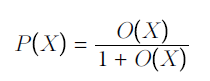

So if I have an odds 7/3, I can convert it into a proportional probability like this:

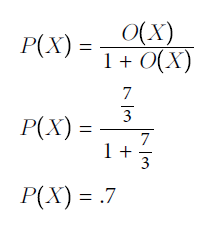

Conversely, you can turn an odds into a probability simply by dividing the probability of the event occurring by the probability it will not occur :
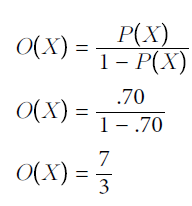

### **Difference between Probability and Statistics**

Probability is purely theoretical of how likely an event is to happen and does not require data. Statistics, on the other hand, cannot exist without data and uses it to discover probability and provides tools to describe data.

### **Joint Probabilities**

Let’s say you have a fair coin and a fair six-sided die. You want to find the probability of flipping a heads and rolling a 6 on the coin and die, respectively. These are two separate probabilities of two separate events, but we want to find the probability that both events will occur together. This is known as a joint probability.

**Product Rule**

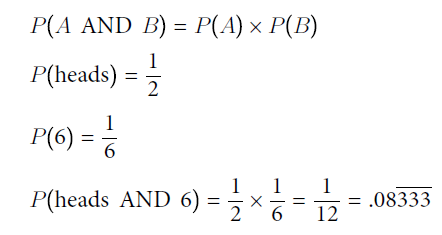

### **Union Probabilities**

Mutually exclusive events, which are events that cannot occur simultaneously. For example, if I roll one die I cannot simultaneously get a 4 and a 6. I can only get one outcome. Getting the union probability for these cases is easy. I simply add them together. If I want to find the probability of getting a 4 or 6 on a die roll, it is going to be 2/6 = 1/3.

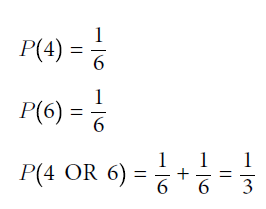

**Non mutually exclusive events**, which are events that can occur simultaneously? Let’s go back to the coin flip and die roll example. What is the probability of getting a heads OR a 6?

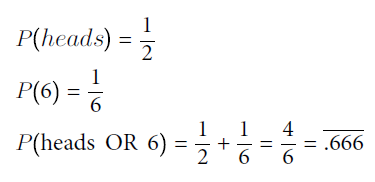

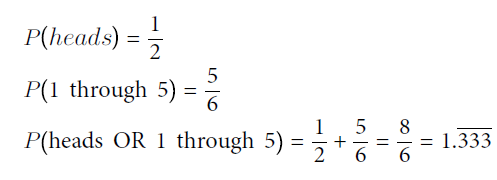

**We are getting double counts here too, because a probability
must be no more than 100% or 1.0.**

**Sum rule of probability** :

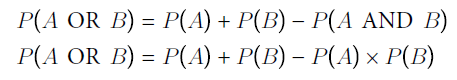

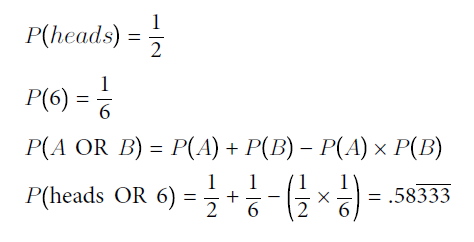

### **Conditional Probability and Bayes’ Theorem**

The probability of an event A occurring given event B has occurred. It is
typically expressed as P(A GIVEN B) or P(A|B).

Let’s say a study makes a claim that 85% of cancer patients drank coffee.
P(Coffee given Cancer) or P(Coffee|Cancer). This represents a **probability of people who drink coffee given they have cancer.**

let’s compare this to the percentage of people diagnosed with cancer (0.5%) and the percentage of people who drink coffee (65%) :

P(Coffee) = .65

P(Cancer) = .005

P(Coffee|Cancer) = .85

The “probability of having cancer given you are a coffee drinker” is different from the “probability of being a coffee drinker given you have cancer.” To put it simply: few coffee drinkers have cancer, but many cancer patients drink coffee.

If we are interested in studying whether coffee contributes to cancer, we really are interested in the first conditional probability: the probability of someone having cancer given they are a coffee drinker.

P(Coffee|Cancer) = .85

P(Cancer|Coffee) = ?


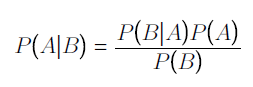

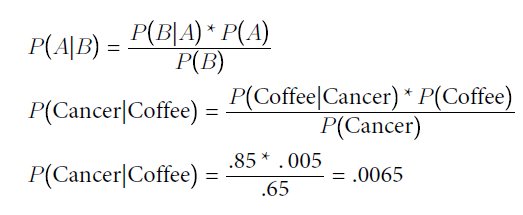

In [2]:
p_coffee_drinker = .65

p_cancer = .005

p_coffee_drinker_given_cancer = .85

p_cancer_given_coffee_drinker = round((p_coffee_drinker_given_cancer * p_cancer / p_coffee_drinker),4)

print(p_cancer_given_coffee_drinker)

0.0065


### **Joint and Union Conditional Probabilities**

I want to find the probability somebody is a coffee drinker AND they have cancer.

**Option 1:**

P(Coffee) × P(Cancer) = .65 × .005 = .00325

**Option 2:**

P(Coffee|Cancer) × P(Cancer) = .85 × .005 = .00425

---
---

P(Coffee and Cancer) = P(Coffee|Cancer) × P(Cancer) = .85 × .005 = .00425

P(Cancer|Coffee) × P(Coffee) = .0065 × .65 = .00425

---
---

If event A has no impact on event B, then what does that
mean for conditional probability P(B|A)? That means P(B|A) = P(B), meaning event A occurring makes no difference to how likely event B is to occur.

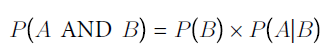

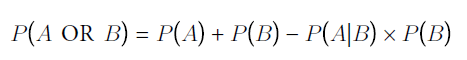







### **Binomial Distribution**

If you flip a coin 10 times and get 8 heads, it does not mean
the coin is fixed at 80%.

Binomial distribution, which measures how likely k successes can happen out of n trials given p probability.

how likely k successes (8 Heads) can happen out of n trials (10 Times) given p probability (80%)

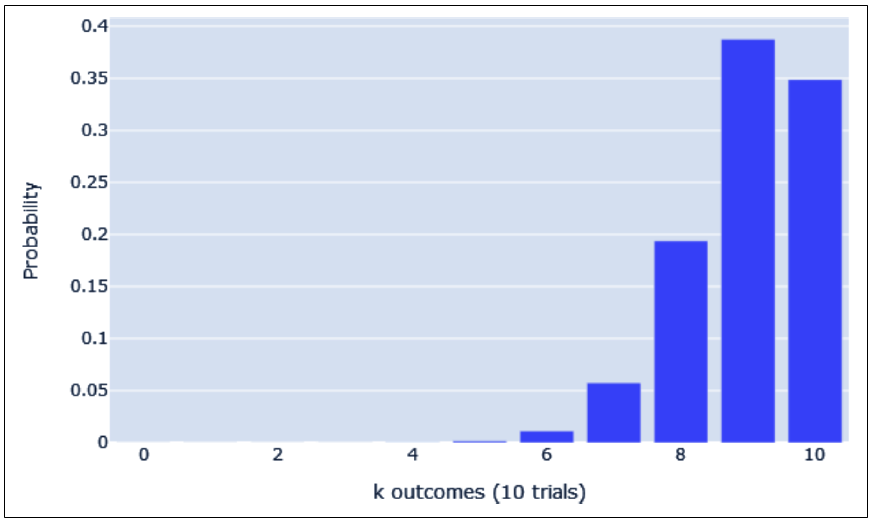

**Credit - Thomas Nield (O Rilley)**

**Building a binomial distribution from scratch**

In [3]:
# Factorials multiply consecutive descending integers down to 1
# EXAMPLE: 5! = 5 * 4 * 3 * 2 * 1

def factorial(n: int):
  f = 1
  for i in range(n):
    f *= (i + 1)
  return f

# Generates the coefficient needed for the binomial distribution

def binomial_coefficient(n: int, k: int):
  return factorial(n) / (factorial(k) * factorial(n - k))

# Binomial distribution calculates the probability of k events out of n trials
# given the p probability of k occurring

def binomial_distribution(k: int, n: int, p: float):
  return binomial_coefficient(n, k) * (p ** k) * (1.0 - p) ** (n - k)

# 10 trials where each has 90% success probability

n = 10 #no of trials
p = 0.9 #probability of success

#k is the number of success we need

for k in range(n + 1):
  probability = binomial_distribution(k, n, p)
  print("{0} - {1}".format(k, probability))

0 - 9.999999999999978e-11
1 - 8.999999999999981e-09
2 - 3.644999999999994e-07
3 - 8.747999999999988e-06
4 - 0.00013778099999999982
5 - 0.0014880347999999984
6 - 0.01116026099999999
7 - 0.057395627999999976
8 - 0.19371024449999993
9 - 0.38742048900000003
10 - 0.3486784401000001


**Building a binomial distribution from Scipy**

In [6]:
from scipy.stats import binom

n = 10
p = 0.9

for k in range(n+1):
  probability = binom.pmf(k, n, p)
  print(f'{0} - {1}', k, probability)

0 - 1 0 9.999999999999978e-11
0 - 1 1 8.999999999999978e-09
0 - 1 2 3.6449999999999943e-07
0 - 1 3 8.747999999999991e-06
0 - 1 4 0.00013778099999999974
0 - 1 5 0.0014880347999999982
0 - 1 6 0.011160260999999996
0 - 1 7 0.05739562799999997
0 - 1 8 0.1937102444999998
0 - 1 9 0.38742048899999976
0 - 1 10 0.3486784401000001
